In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
df=pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [15]:
df.shape

(225870, 12)

In [16]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.258700e+05,225870.000000,225870.000000,225869.000000,155760.000000,69140.000000,225869.000000
mean,1.002944e+06,8.087825,0.408492,5.292674,9.847304,12.655959,9318.725310
std,1.698480e+03,6.527166,0.491556,3.748076,5.085555,4.127783,4971.357354
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001463e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5860.000000
50%,1.002982e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004344e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225870 entries, 0 to 225869
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     225870 non-null  int64  
 1   Product_ID                  225870 non-null  object 
 2   Gender                      225870 non-null  object 
 3   Age                         225870 non-null  object 
 4   Occupation                  225870 non-null  int64  
 5   City_Category               225870 non-null  object 
 6   Stay_In_Current_City_Years  225870 non-null  object 
 7   Marital_Status              225870 non-null  int64  
 8   Product_Category_1          225869 non-null  float64
 9   Product_Category_2          155760 non-null  float64
 10  Product_Category_3          69140 non-null   float64
 11  Purchase                    225869 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 20.7+ MB


In [18]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,1
Product_Category_2,70110


# **Data Visualization**

<ipython-input-19-c63aceb0ed84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Gender",palette='mako')


<Axes: xlabel='Gender', ylabel='count'>

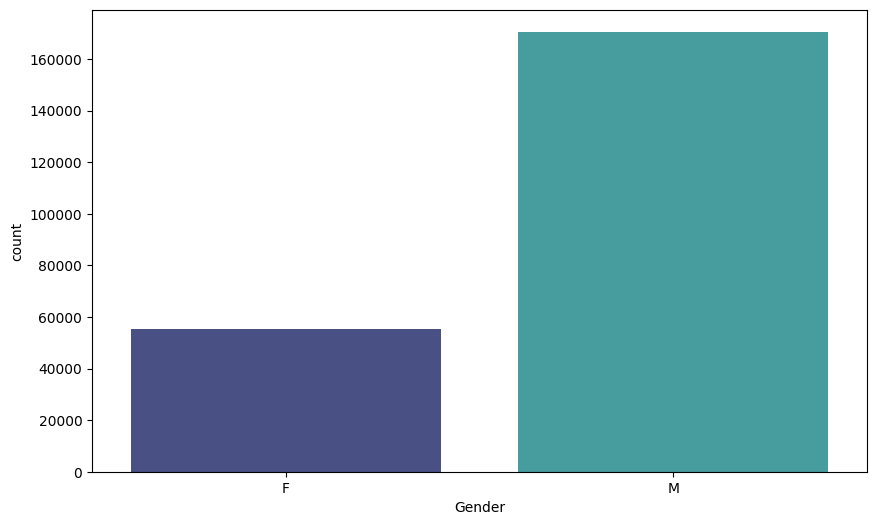

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Gender",palette='mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

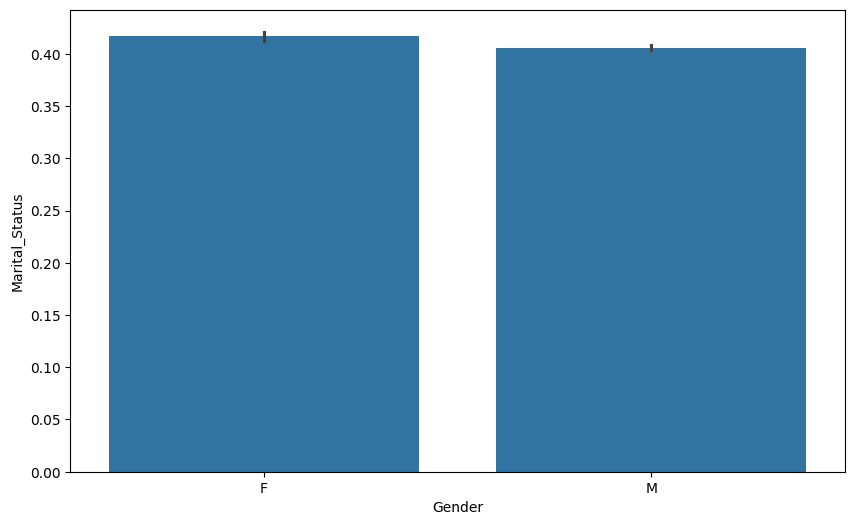

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

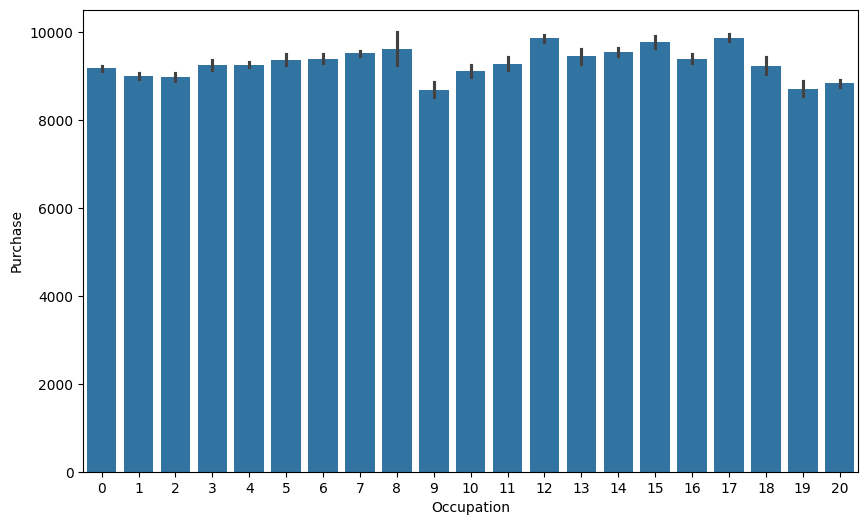

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation',y='Purchase',data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

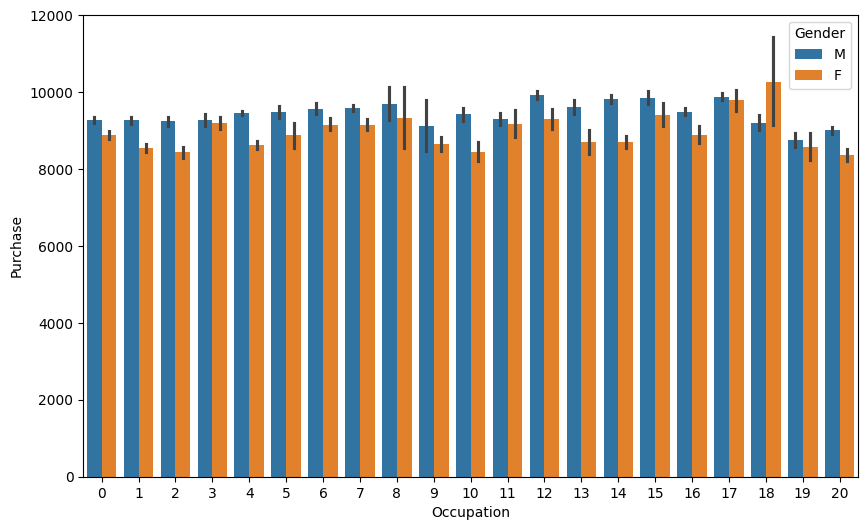

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="Occupation",y="Purchase",hue="Gender",data=df)

# **Outlier**

<Axes: xlabel='Gender', ylabel='Purchase'>

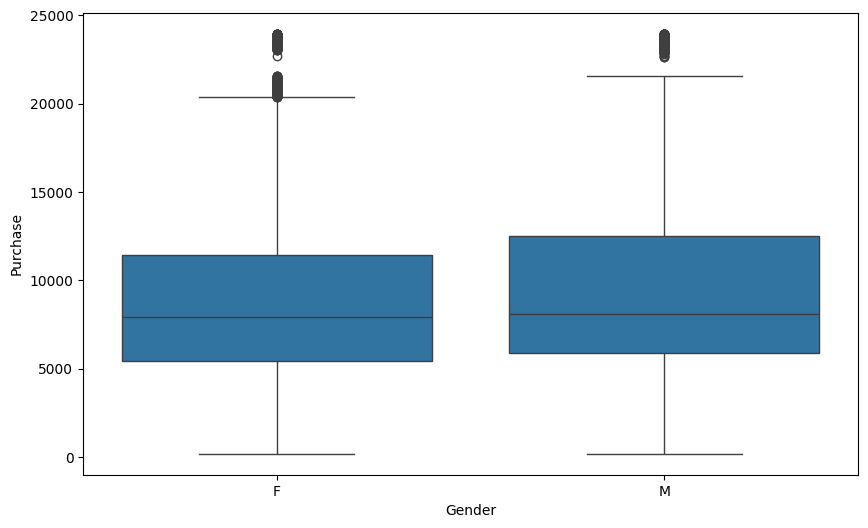

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Gender",y="Purchase")

<Axes: xlabel='Occupation', ylabel='Purchase'>

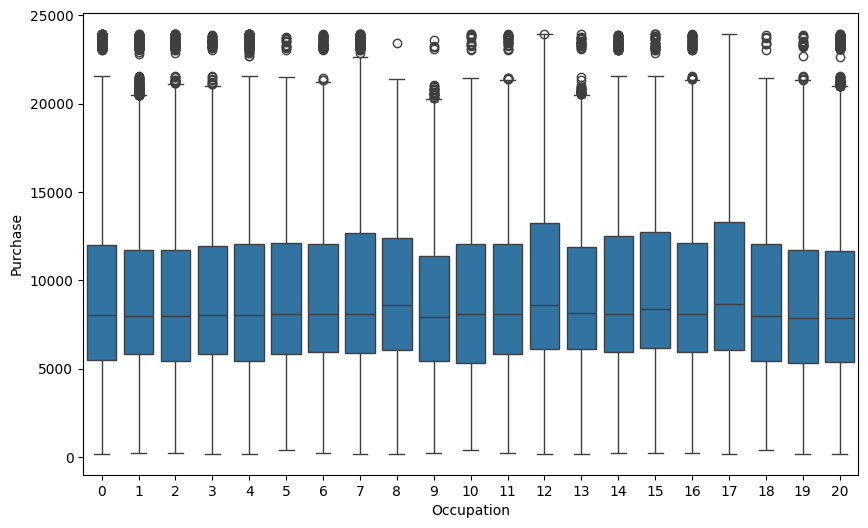

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Occupation",y="Purchase")

<Axes: xlabel='Age', ylabel='Purchase'>

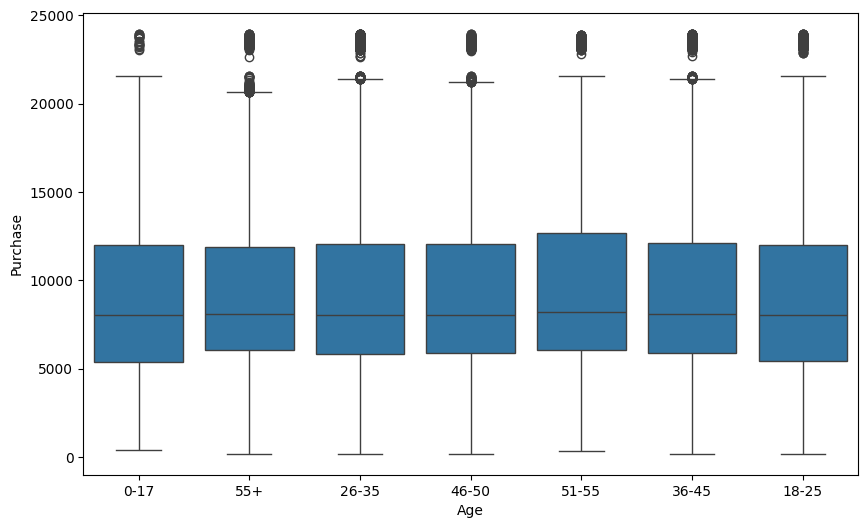

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Age",y="Purchase")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

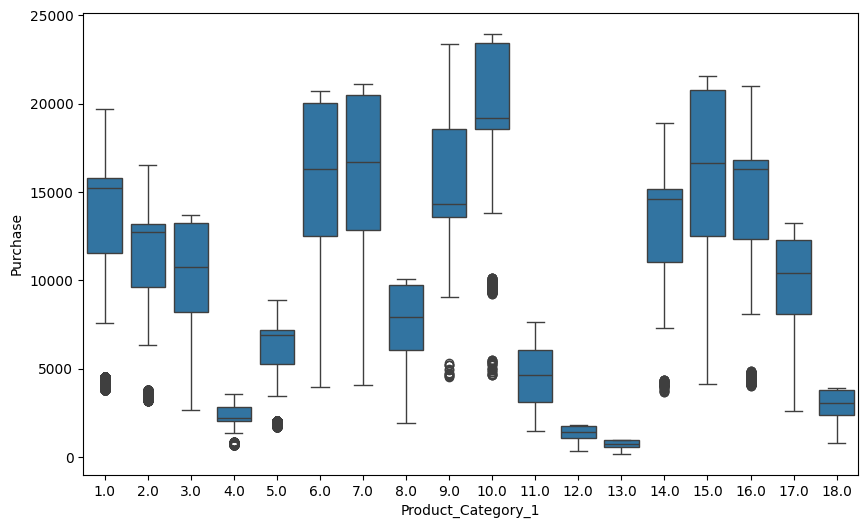

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Product_Category_1",y="Purchase")

# **Data_Preprocessing**

In [27]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
225865,1004800,P00182742,M,18-25,4,A,1,0,1.0,2.0,14.0,11606.0
225866,1004800,P00157142,M,18-25,4,A,1,0,11.0,16.0,NaN,1625.0
225867,1004800,P00018642,M,18-25,4,A,1,0,8.0,NaN,NaN,3913.0
225868,1004800,P00111142,M,18-25,4,A,1,0,1.0,15.0,16.0,15397.0


# **Distribution Plot**

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figur

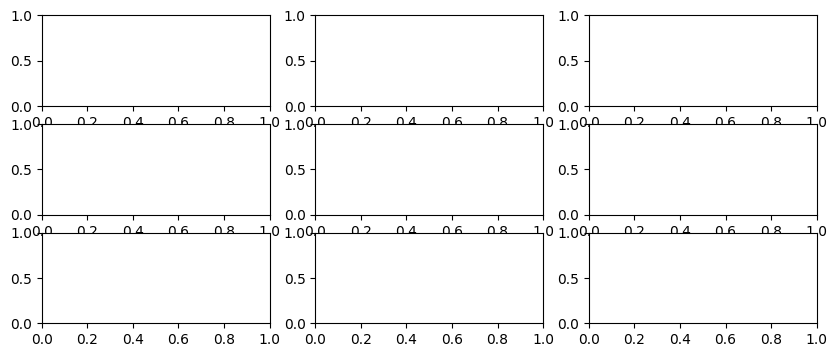

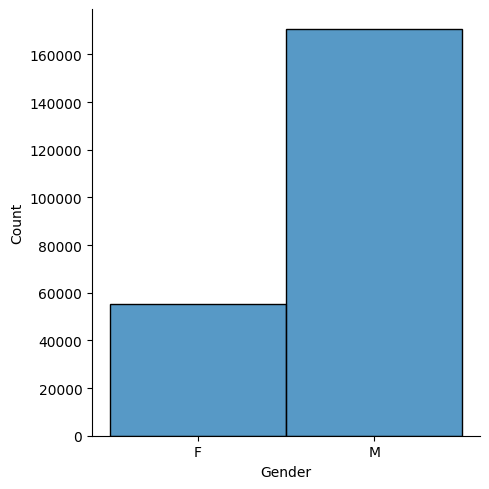

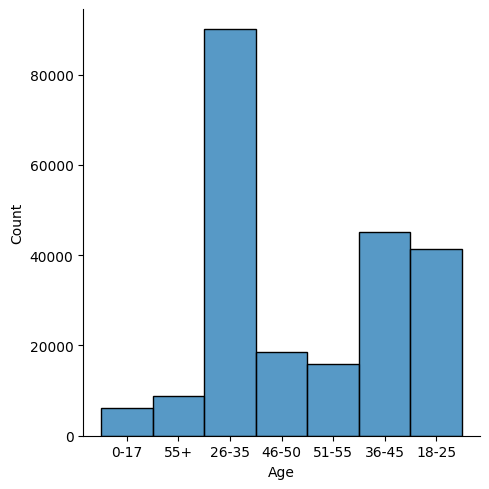

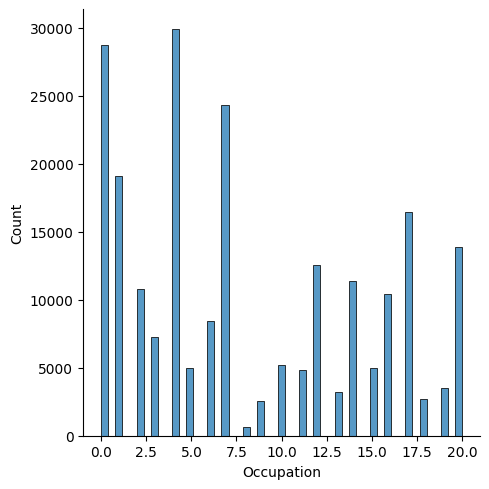

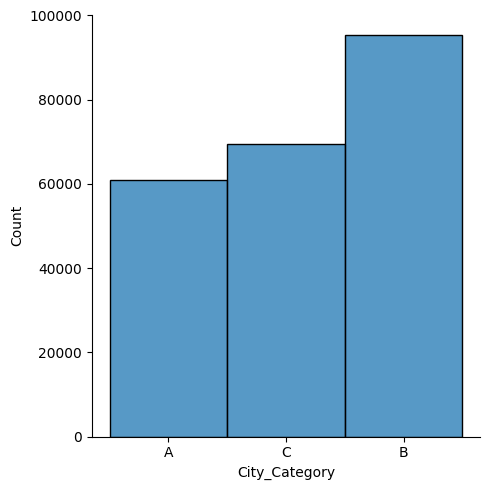

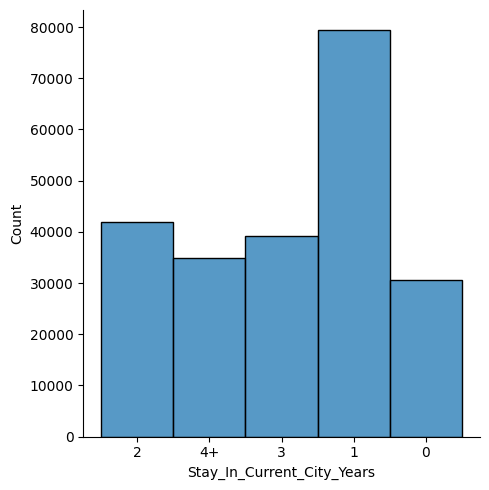

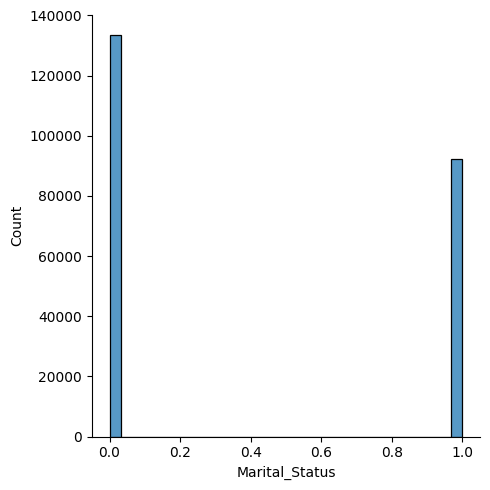

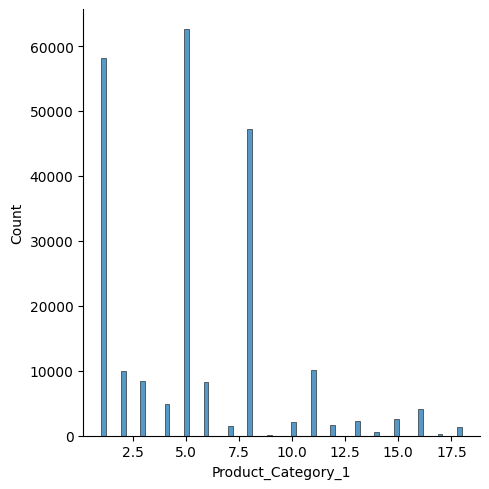

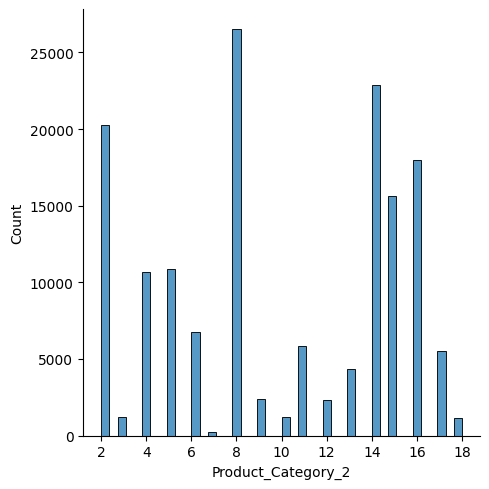

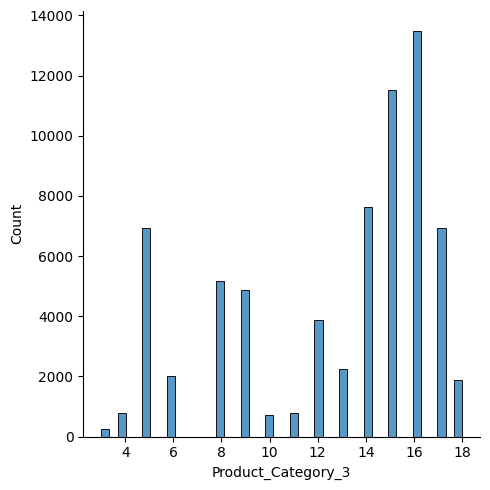

In [28]:
rows=3
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
  for j in range(cols):
    sns.displot(df[col[index]],ax=ax[i][j])
    index=index+1
plt.tight_layout()

In [29]:
df['Purchase']=np.log(df['Purchase'])

In [30]:
df=pd.get_dummies(df)
df.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,3.0,NaN,NaN,9.032409,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1000001,10,0,1.0,6.0,14.0,9.629051,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1000001,10,0,12.0,NaN,NaN,7.259820,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1000001,10,0,12.0,14.0,NaN,6.963190,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1000002,16,0,8.0,NaN,NaN,8.983314,False,False,False,...,False,True,False,False,True,False,False,False,False,True


# **Train_Test_Split**

In [31]:
x=df.drop(labels=['Purchase'],axis=1)
y=df['Purchase']
x.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,3.0,NaN,NaN,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1000001,10,0,1.0,6.0,14.0,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1000001,10,0,12.0,NaN,NaN,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1000001,10,0,12.0,14.0,NaN,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1000002,16,0,8.0,NaN,NaN,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [32]:
y

,Purchase
0,9.032409
1,9.629051
2,7.259820
3,6.963190
4,8.983314
...,...
225865,9.359277
225866,7.393263
225867,8.272060
225868,9.641928


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(180696, 3507)
(45174, 3507)
(180696,)
(45174,)


#**Scaling The Data**

In [ ]:
scaled=StandardScaler()
x_train_test=scaled.fit_transform(x_train)
x_test_test=scaled.transform(x_test)

#**Machine Learning**

# **Linear_Regression**

In [ ]:
model=Linear_Regression()
model.fit(x_train,y_train)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

# **Decision Tree Regression**

In [ ]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(x_train,y_train)

In [ ]:
train_preds=DT.predict(x_train)
test_preds=DT.predict(x_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
RMSE_test=(np.squrt(metrics.mean_squared_error(y_test,test_preds)))
print("RMSE_training:",str(RMSE_train))
print("RMSE_testing:",str(RMSE_test))
print("-"*50)
print("Rsquared value on train:",DT.score(x_train,y_train))
print("Rsquared value on test:",DT.score(x_test,y_test))

# **Random_Forest_Regressor**

In [ ]:
RF=RandomForestRegressor().fit(x_train,y_train)

In [ ]:
train_preds1=RF.predict(x_train)
test_predict1=RF.predict(x_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.squrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE_training:",str(RMSE_train))
print("RMSE_testing:",str(RMSE_test))
print("-"*50)
print("Rsquared value on train:",DT.score(x_train,y_train))
print("Rsquared value on test:",DT.score(x_test,y_test))

# **Loading_test_Data**

In [ ]:
df_test=pd.read_csv('test.csv')
df_test

In [ ]:
df_test.isnull().sum()

# **The Null Values In THe Test Data Have To Be Treated As Well**

In [ ]:
df_test['Product_ID']=df_test['Product_ID'].str.replace('prod_','')
ss=StandardScaler()
df_test['Product_ID']=ss.fit_transform(df_test[['Product_ID'].values.reshape(-1,1)])

In [ ]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)
df_test.head()

In [ ]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test

In [ ]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

In [ ]:
f_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')

In [ ]:
df_test= pd.get_dummies(df_test)

In [ ]:
df_test.head()

In [ ]:
df.shape

In [ ]:
df_test.shape

In [ ]:
df

In [ ]:
df_test

In [ ]:
test_preds= RF.predict(df_test)
len(test_preds)

**Random Perform Well As Compared To Linear Regression And Decision Tree Regression**

In [ ]:
id_frame=pd.read_csv('test.csv')
id_frame.head()

In [ ]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()

In [ ]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()

In [ ]:
predictions.to_csv('BlackFridayPredictions.csv', index=False)